In [25]:
# パッケージをインポート
import pandas as pd
import numpy as np
import scipy
from scipy import stats as st
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [26]:
# Audio_Summary_Visualized.ipynb で作成されたファイルを読み込み
result = pd.read_csv("Top_Hits_2000_2019.csv")

In [27]:
# 100トラックごと（各年）の平均値を計算
# 定量的パラメータについて
tempo_mean = []
dur_mean = []
for i in range(0, 2000, 100):
    tempo_mean.append(np.mean(result["tempo [bpm]"][i : i + 100]))
    dur_mean.append(np.mean(result["duration [min]"][i : i + 100]))

In [28]:
# ジャンルとキーの配列を作成
genre_lis = result["genre"].unique()
key_lis = result["key"].unique()

In [29]:
# 順序を確認するため出力
print(genre_lis)
print(key_lis)

['pop' 'rock' 'hip hop' 'Dance/Electronic' 'metal' 'R&B' 'Others'
 'World/Traditional' 'latin' 'country']
['C#' 'C' 'G' 'G#' 'D' 'F' 'F#' 'B' 'D#' 'A#' 'A' 'E']


In [30]:
# 各ジャンルとキーのカウントを格納する空のリストを作成
(
    pop_count,
    hiphop_count,
    rock_count,
    dance_count,
    latin_count,
    rb_count,
    country_count,
    world_count,
    metal_count,
    others_count,
) = ([], [], [], [], [], [], [], [], [], [])
(
    C_count,
    Cs_count,
    D_count,
    Ds_count,
    E_count,
    F_count,
    Fs_count,
    G_count,
    Gs_count,
    A_count,
    As_count,
    B_count,
) = ([], [], [], [], [], [], [], [], [], [], [], [])
# トラックを反復し、頻度をカウント
for i in range(0, 2000, 100):
    df = result.iloc[i : i + 99]
    pop_count.append((df["genre"] == genre_lis[0]).sum())
    rock_count.append((df["genre"] == genre_lis[1]).sum())
    hiphop_count.append((df["genre"] == genre_lis[2]).sum())
    dance_count.append((df["genre"] == genre_lis[3]).sum())
    metal_count.append((df["genre"] == genre_lis[4]).sum())
    rb_count.append((df["genre"] == genre_lis[5]).sum())
    others_count.append((df["genre"] == genre_lis[6]).sum())
    world_count.append((df["genre"] == genre_lis[7]).sum())
    latin_count.append((df["genre"] == genre_lis[8]).sum())
    country_count.append((df["genre"] == genre_lis[9]).sum())

    Cs_count.append((df["key"] == key_lis[0]).sum())
    C_count.append((df["key"] == key_lis[1]).sum())
    G_count.append((df["key"] == key_lis[2]).sum())
    Gs_count.append((df["key"] == key_lis[3]).sum())
    D_count.append((df["key"] == key_lis[4]).sum())
    F_count.append((df["key"] == key_lis[5]).sum())
    Fs_count.append((df["key"] == key_lis[6]).sum())
    B_count.append((df["key"] == key_lis[7]).sum())
    Ds_count.append((df["key"] == key_lis[8]).sum())
    As_count.append((df["key"] == key_lis[9]).sum())
    A_count.append((df["key"] == key_lis[10]).sum())
    E_count.append((df["key"] == key_lis[11]).sum())

In [31]:
# 年に適切なラベルの配列を作成
yr_label = []
for i in range(20):
    if i < 10:
        yr_label.append("'0" + str(i))
    else:
        yr_label.append("'" + str(i))

In [32]:
# DataFrameを作成
df = pd.DataFrame(
    {
        "year": np.arange(20) + 2000,
        "mean_tempo_bpm": tempo_mean,
        "mean_duration_min": dur_mean,
        "pop_count": pop_count,
        "hiphop_count": hiphop_count,
        "rock_count": rock_count,
        "dance_count": dance_count,
        "latin_count": latin_count,
        "rb_count": rb_count,
        "country_count": country_count,
        "metal_count": metal_count,
        "others_count": others_count,
        "C_count": C_count,
        "C#_count": Cs_count,
        "D_count": D_count,
        "E_count": E_count,
        "F_count": F_count,
        "F#_count": Fs_count,
        "G_count": G_count,
        "G#_count": Gs_count,
        "A_count": A_count,
        "A#_count": As_count,
        "B_count": B_count,
    }
)

## データフレームをCSVファイルとして保存

In [33]:
# データフレームをCSVファイルとして保存
df.to_csv("Top_Hits_Yearly.csv", index=False)

## 定性分析（ジャンル・キー）

In [34]:
# Kaggleからオーディオ統計データセットを読み込み
result_new = pd.read_csv("Top_Hits_Yearly.csv")

genre_lis = result_new.columns[3:12]
key_lis = result_new.columns[12:25]

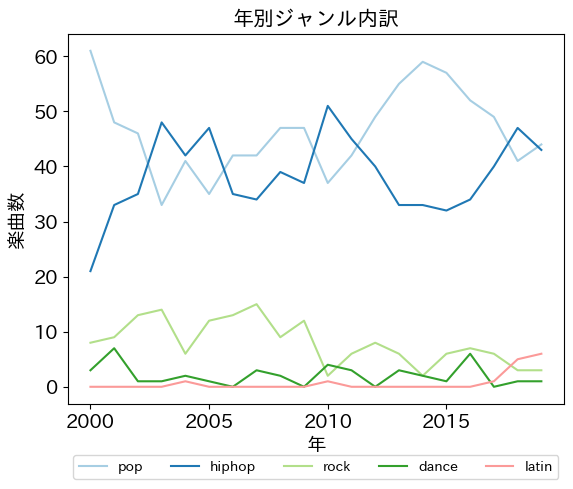

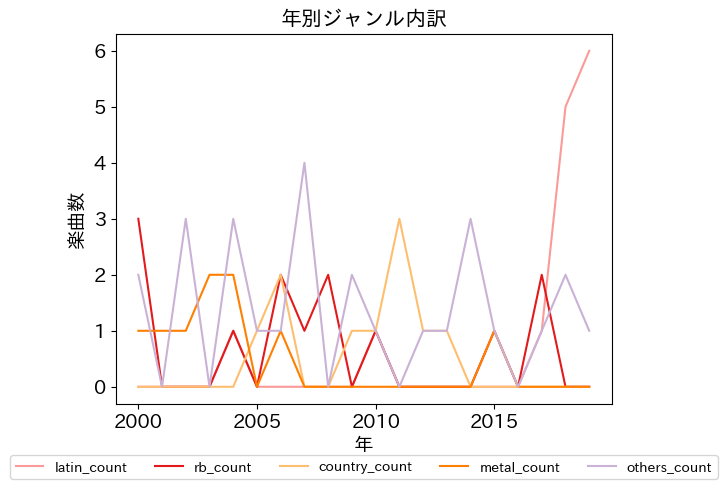

In [35]:
fig, ax = plt.subplots()

# カラーパレットを定義
colors = sns.color_palette("Paired", 10)

for i in range(0, 5):  # len(genre_lis)):
    plt.plot(
        result_new["year"],
        result_new[genre_lis[i]],
        color=colors[i],
        label=(genre_lis[i]).split("_")[0],
    )

plt.title("年別ジャンル内訳", fontsize=15)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.xlabel("年", fontsize=14)
plt.ylabel("楽曲数", fontsize=14)

plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=5)
plt.show()

fig, ax = plt.subplots()

# カラーパレットを定義
colors = sns.color_palette("Paired", 10)

for i in range(4, 9):  # len(genre_lis)):
    plt.plot(
        result_new["year"],
        result_new[genre_lis[i]],
        color=colors[i],
        label=genre_lis[i],
    )

plt.title("年別ジャンル内訳", fontsize=15)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.xlabel("年", fontsize=14)
plt.ylabel("楽曲数", fontsize=14)

plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=5)
plt.show()

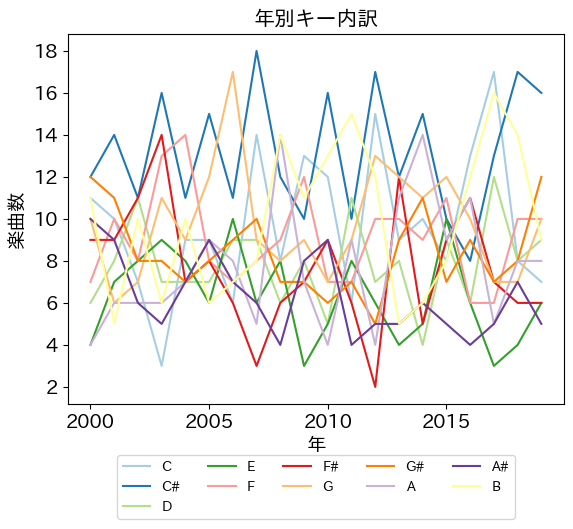

In [36]:
fig, ax = plt.subplots()
# カラーパレットを定義
colors = sns.color_palette("Paired", len(key_lis))

for i in range(0, 11):  # len(genre_lis)):
    plt.plot(
        result_new["year"],
        result_new[key_lis[i]],
        color=colors[i],
        label=(key_lis[i]).split("_")[0],
    )

plt.title("年別キー内訳", fontsize=15)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.xlabel("年", fontsize=14)
plt.ylabel("楽曲数", fontsize=14)

plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=5)
plt.show()